![](images/vaccine-6116391_1920_pixabay.jpg)

# **COVID-19 Vaccination Progress EDA**

***
***

# Table of Contents

1. INTRODUCTION

    *1.1 COVID-19 pandemic*
    
    *1.2 COVID-19 vaccines*
    
    *1.3 Key objective*
    
    *1.4 Dataset overview*

2. IMPORTS AND DATA PREPARATION

    *2.1 Importing libraries and data*

    *2.2 Preliminary data exploration and subsequent cleaning*

    *2.3 Feature engineering to prepare for in-depth data analysis*

3. IN-DEPTH DATA ANALYSIS AND VISUALISATION

    *3.1 Distributions of .... (abs and %)*
    
    *3.2 Time-course of...*
    
    *3.3 TIme-series analysis of...*

***
***

## 1.4 Dataset Overview

**The dataset contains 8079 observations for 15 features.**

| FEATURE | description | comment |
|----|----|----|
| **country** | 151 countries | some duplicates |
| **iso_code** | country code by ISO norm | -|
| **date** | data entry (13th December 2020 to 24th March 2021) | - |
| **vaccines** | name/company | - |
| **daily_vaccinations** | no. of vaccination for that date/country | some days only daily vaccinations, some days only the (cummulative) total |
| **daily_vaccinations_raw** | daily vaccinations as CHANGE COMPARED TO PREVIOUS DAY (sanity check) | - |
| **daily_vaccinations_per_million** | ratio (in ppm) between vaccination number and total population for the current date in the country | - |
| **total_vaccinations** | absolute number of total immunizations in the country | some days only daily vaccinations, some days only the (cummulative) total |
| **total_vaccinations_per_hundred** | ratio (in percent) between vaccination number and total population up to the date in the country | - |
| **people_vaccinated** | total no. of people with immunisation (partial and full) | - |
| **people_vaccinated_per_hundred** | ratio (in percent) between population immunized (partial and full) and total population | - |
| **people_fully_vaccinated** | total no. of people with full immunisation (typically 2) | - |
| **people_fully_vaccinated_per_hundred** | ratio (in percent) between population fully immunized and total population | - |
| **source_name** | national authority, international organization, local organization etc. | - |
| **source_website** | website link | - |

# Introduction

-Vaccinaction: Version 81

-Tweets: Version 43

##Track the progress of COVID-19 vaccination

Was muss für ordentliches Mark up gemacht werden?

-What vaccines are used and in which countries?

-What country is vaccinated more people?

-What country is vaccinated a larger percent from its population?

The submission evaluation will be based on the:

Originality of your solution;
Quality of data analysis;
Methods and techniques presentation;
Quality of results;
Comments and conclusions.

add link to WHO site wrt covid overrview and vaccine overview?
UN recognises 197 countries, 193 are members, we have 151(-4)=149

##Tweets
### Perform sentiment analysis on the tweets looking to things like:

- Sentiment polarity (Negative/Positive/Neutral) in relationship with each vaccine (looking to the association with the vaccine name, as found in tweets);
Evolution of sentiment in time;

Expected:
Data analysis;
Method for sentiment analysis;
Results;
Comments and conclusions.

## Covid-19 vaccination progress:
Content
The data contains the following information:

- Country- this is the country for which the vaccination information is provided;

- Country ISO Code - ISO code for the country;

- Date - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

- Total number of vaccinations - this is the absolute number of total immunizations in the country;

- Total number of people vaccinated - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

- Total number of people fully vaccinated - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
- Daily vaccinations (raw) - for a certain data entry, the number of vaccination for that date/country (daily_vaccinations_raw: daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead);
- Daily vaccinations - for a certain data entry, the number of vaccination for that date/country;
- Total vaccinations per hundred - ratio (in percent) between vaccination number and total population up to the date in the country;
- Total number of people vaccinated per hundred - ratio (in percent) between population immunized and total population up to the date in the country;
- Total number of people fully vaccinated per hundred - ratio (in percent) between population fully immunized and total population up to the date in the country;
- Number of vaccinations per day - number of daily vaccination for that day and country;
- Daily vaccinations per million - ratio (in ppm) between vaccination number and total population for the current date in the country;
- Vaccines used in the country - total number of vaccines used in the country (up to date);
- Source name - source of the information (national authority, international organization, local organization etc.);
- Source website - website of the source of information;


In [103]:
#import basic libraries:
import numpy as np
import pandas as pd
from datetime import datetime

#import for visualization
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from pandas_profiling import ProfileReport

sns.set(rc={'figure.figsize':(20,20)})

import missingno

#suppress pandas future warnings:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [104]:
#import dataset country_vaccinations:
df = pd.read_csv('data/country_vaccinations.csv')

In [105]:
#first check:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [106]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
8074,Zimbabwe,ZWE,2021-03-20,42210.0,42210.0,NaN,523.0,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8075,Zimbabwe,ZWE,2021-03-21,42729.0,42729.0,NaN,519.0,910.0,0.29,0.29,NaN,61.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8076,Zimbabwe,ZWE,2021-03-22,43294.0,43294.0,NaN,565.0,805.0,0.29,0.29,NaN,54.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8077,Zimbabwe,ZWE,2021-03-23,44135.0,44135.0,NaN,841.0,655.0,0.30,0.30,NaN,44.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...
8078,Zimbabwe,ZWE,2021-03-24,49404.0,49404.0,NaN,5269.0,1400.0,0.33,0.33,NaN,94.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1374795915...


In [107]:
#Number of columns and rows:
shape1 = df.shape
print(f'We have {shape1[1]} columns and {shape1[0]} rows in our dataset.')

We have 15 columns and 8079 rows in our dataset.


In [108]:
#Information about datatypes per column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8079 non-null   object 
 1   iso_code                             8079 non-null   object 
 2   date                                 8079 non-null   object 
 3   total_vaccinations                   4984 non-null   float64
 4   people_vaccinated                    4423 non-null   float64
 5   people_fully_vaccinated              3021 non-null   float64
 6   daily_vaccinations_raw               4192 non-null   float64
 7   daily_vaccinations                   7891 non-null   float64
 8   total_vaccinations_per_hundred       4984 non-null   float64
 9   people_vaccinated_per_hundred        4423 non-null   float64
 10  people_fully_vaccinated_per_hundred  3021 non-null   float64
 11  daily_vaccinations_per_million

Cleaning task: 
- change object to datetime for column date
- Check missing values in all columns with rows less than 8079

In [109]:
df.nunique()

country                                 151
iso_code                                151
date                                    102
total_vaccinations                     4784
people_vaccinated                      4253
people_fully_vaccinated                2880
daily_vaccinations_raw                 3868
daily_vaccinations                     5563
total_vaccinations_per_hundred         1955
people_vaccinated_per_hundred          1663
people_fully_vaccinated_per_hundred     818
daily_vaccinations_per_million         3698
vaccines                                 26
source_name                              92
source_website                          147
dtype: int64

Categorical data: country, iso_code, vaccines  #source_name, source_website

In [110]:
#basic statistic
df.describe().transpose().round()

,count,mean,std,min,25%,50%,75%,max
total_vaccinations,4984.0,2597915.0,9383280.0,0.0,40452.0,276962.0,1303350.0,130473853.0
people_vaccinated,4423.0,2073454.0,6824277.0,0.0,36780.0,249555.0,1007708.0,85472166.0
people_fully_vaccinated,3021.0,893378.0,3595095.0,1.0,19019.0,111716.0,488937.0,46365515.0
daily_vaccinations_raw,4192.0,92034.0,289560.0,0.0,2738.0,13838.0,56702.0,4575496.0
daily_vaccinations,7891.0,60968.0,213914.0,1.0,1026.0,6161.0,27794.0,2541597.0
total_vaccinations_per_hundred,4984.0,10.0,18.0,0.0,1.0,4.0,11.0,162.0
people_vaccinated_per_hundred,4423.0,8.0,12.0,0.0,1.0,3.0,9.0,90.0
people_fully_vaccinated_per_hundred,3021.0,4.0,8.0,0.0,0.0,2.0,3.0,72.0
daily_vaccinations_per_million,7891.0,2699.0,4163.0,0.0,363.0,1305.0,3211.0,54264.0


In [111]:
#Basic profile
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

Data cleaning tasks:
- countries have different names (e.g. England, United Kingdom, Northern Ireland, Wales, Scotland)
- drop daily_vaccinations_raw
(set categorical data to categorical data tpye)

In [112]:
#copy dataset before cleaning
df1 = df.copy()

In [113]:
#change type for date to datetime
df1['date'] =  pd.to_datetime(df1['date'])

In [114]:
#test changes to date
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8079 non-null   object        
 1   iso_code                             8079 non-null   object        
 2   date                                 8079 non-null   datetime64[ns]
 3   total_vaccinations                   4984 non-null   float64       
 4   people_vaccinated                    4423 non-null   float64       
 5   people_fully_vaccinated              3021 non-null   float64       
 6   daily_vaccinations_raw               4192 non-null   float64       
 7   daily_vaccinations                   7891 non-null   float64       
 8   total_vaccinations_per_hundred       4984 non-null   float64       
 9   people_vaccinated_per_hundred        4423 non-null   float64       
 10  people_fully

In [116]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [117]:
#check for duplicates in country and date:
df1[df1.duplicated(subset=['country','date'], keep=False)].shape

(0, 15)

In [118]:
#drop column daily_vaccinations_raw, iso_code, source_name, source_website:
lst = ['iso_code', 'daily_vaccinations_raw', 'source_name', 'source_website']
df1.drop(lst, 1, inplace=True)
df1.head(3)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca


In [119]:
df1 = df1[df1.country.apply(lambda x: x not in ['England', 'Scotland', 'Wales', 'Northern Ireland'])]

In [120]:
lst2 = ['England', 'Scotland', 'Wales', 'Northern Ireland']
check1 = df1.loc[df['country'].isin(lst2)].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].sum()
check2 = df1.loc[df['country'] == 'United Kingdom'].loc[df1['date'] == '2021-03-15'].loc[:, 'daily_vaccinations'].values[0]
print(f'The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: {check1}')
print(f'The total daily vaccinations in the United Kingdom on 15th March 2021 was: {check2}')

The sum of daily vaccinations in England, Scotland, Wales and Nothern Ireland on 15th March 2021 was: 0.0
The total daily vaccinations in the United Kingdom on 15th March 2021 was: 389942.0


In [121]:
# map countries to regions(list to correct/improve!, change regions in Industrienationen und Entwicklungsländer?, Europe or separate into EU and .... UK und British oversea zusammenfassen?):
def groupCountries(df1):
    map_dictionary ={
        "Afghanistan": "Asia",
        "Albania": "Europe",
        "Algeria": "Africa",
        "Andorra": "Europe",
        "Angola": "Africa",
        "Anguilla": "UK & British Oversea",
        "Antigua and Barbuda": "Caribic",
        "Argentina": "South America",
        "Australia": "Australia & New Zealand",
        "Austria": "Europe",
        "Azerbaijan": "Asia",
        "Bahamas": "Caribic",
        "Bahrain": "Middle East",
        "Bangladesh": "Asia",
        "Barbados": "Caribic",
        "Belarus": "Europe", 
        "Belgium": "Europe",
        "Belize": "Central America",
        "Bermuda": "UK & British Oversea",
        "Bolivia": "South America",
        "Brazil":  "South America",
        "Bulgaria": "Europe",
        "Cambodia": "Asia",
        "Canada": "North America", 
        "Cayman Islands": "UK & British Oversea",
        "Chile": "South America",
        "China": "China",
        "Colombia": "South America",
        "Costa Rica": "Central America",
        "Cote d'Ivoire": "Africa",
        "Croatia": "Europe",
        "Cyprus": "Europe",
        "Czechia": "Europe",
        "Denmark": "Europe",
        "Dominica": "Caribic",
        "Dominican Republic": "Caribic",
        "Ecuador": "South America",
        "Egypt": "Africa",
        "El Salvador": "Central America", 
        "Equatorial Guinea": "Africa", 
        "Estonia":  "Europe",
        "Faeroe Islands": "Europe",
        "Falkland Islands": "UK & British Oversea",
        "Finland": "Europe",
        "France": "Europe",
        "Germany": "Europe",
        "Ghana": "Africa",
        "Gibraltar": "UK & British Oversea",
        "Greece": "Europe",
        "Greenland": "Europe",
        "Grenada": "Caribic",
        "Guatemala": "Central America",
        "Guernsey": "UK & British Oversea",
        "Guinea": "Africa",
        "Guyana": "South America",
        "Honduras": "Central America",
        "Hong Kong": "China",
        "Hungary": "Europe",
        "Iceland": "Europe",
        "India": "India",
        "Indonesia": "Asia",
        "Iran": "Middle East",
        "Ireland": "Europe",
        "Isle of Man": "UK & British Oversea",
        "Israel": "Israel",
        "Italy": "Europe",
        "Jamaica": "Caribic",
        "Japan": "Japan",
        "Jersey": "UK & British Oversea",
        "Jordan": "Middle East",
        "Kazakhstan": "Asia",
        "Kenya": "Africa",
        "Kuwait": "Middle East",
        "Laos": "Asia",
        "Latvia": "Europe",
        "Lebanon": "Middle East",
        "Liechtenstein": "Europe",
        "Lithuania": "Europe",
        "Luxembourg": "Europe",
        "Macao": "Asia",
        "Malawi": "Africa",
        "Malaysia": "Asia",
        "Maldives": "Africa",
        "Malta": "Europe",
        "Mauritius": "Africa",
        "Mexico": "Central America",
        "Moldova": "Europe",
        "Monaco": "Europe",
        "Mongolia": "Asia",
        "Montenegro": "Europe",
        "Montserrat": "UK & British Oversea",
        "Morocco": "Africa",
        "Mozambique": "Africa",
        "Myanmar": "Asia",
        "Nepal": "Asia",
        "Netherlands": "Europe",
        "New Zealand": "Australia & New Zealand",
        "Nigeria": "Africa",
        "North Macedonia": "Europe",
        "Northern Cyprus": "Europe",
        "Norway": "Europe",
        "Oman": "Middle East",
        "Pakistan": "Asia",
        "Panama": "Central America",
        "Paraguay": "South America",
        "Peru": "South America",
        "Philippines": "Asia",
        "Poland": "Europe",
        "Portugal": "Europe",
        "Qatar": "Middle East",
        "Romania": "Europe",
        "Russia": "Russia",
        "Rwanda": "Africa",
        "Saint Helena": "UK & British Oversea",
        "Saint Kitts and Nevis": "Caribic",
        "Saint Lucia": "Caribic",
        "Saint Vincent and the Grenadines": "Caribic",
        "San Marino": "Europe",
        "Saudi Arabia": "Middle East",
        "Senegal": "Africa",
        "Serbia": "Europe",
        "Seychelles": "Africa",
        "Singapore": "Asia",
        "Slovakia": "Europe",
        "Slovenia": "Europe",
        "South Africa": "South Africa",
        "South Korea": "Asia",
        "Spain": "Europe",
        "Sri Lanka": "Asia",
        "Suriname": "South America",
        "Sweden": "Europe",
        "Switzerland": "Europe",
        "Taiwan": "Asia",
        "Thailand": "Asia",
        "Trinidad and Tobago": "Caribic", 
        "Tunisia": "Africa",
        "Turkey": "Middle East",
        "Turks and Caicos Islands": "UK & British Oversea",
        "Uganda": "Africa",
        "Ukraine": "Europe",
        "United Arab Emirates": "Middle East",
        "United Kingdom": "UK & British Oversea",
        "United States": "USA",
        "Uruguay": "South America",
        "Venezuela": "South America",
        "Vietnam": "Asia",
        "Zimbabwe": "Africa",   
    } 
    df1['cgrouped']  = df1['country'].map(map_dictionary)
    return df1


In [122]:
groupCountries(df1)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,cgrouped
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Asia
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Asia
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Asia
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Asia
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
8074,Zimbabwe,2021-03-20,42210.0,42210.0,NaN,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Africa
8075,Zimbabwe,2021-03-21,42729.0,42729.0,NaN,910.0,0.29,0.29,NaN,61.0,Sinopharm/Beijing,Africa
8076,Zimbabwe,2021-03-22,43294.0,43294.0,NaN,805.0,0.29,0.29,NaN,54.0,Sinopharm/Beijing,Africa
8077,Zimbabwe,2021-03-23,44135.0,44135.0,NaN,655.0,0.30,0.30,NaN,44.0,Sinopharm/Beijing,Africa


In [123]:
df.isnull().sum(axis = 0)

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     3095
people_vaccinated                      3656
people_fully_vaccinated                5058
daily_vaccinations_raw                 3887
daily_vaccinations                      188
total_vaccinations_per_hundred         3095
people_vaccinated_per_hundred          3656
people_fully_vaccinated_per_hundred    5058
daily_vaccinations_per_million          188
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [124]:
lst_empties = ['', []]
df.vaccines.isin(lst_empties).value_counts()

False    8079
Name: vaccines, dtype: int64

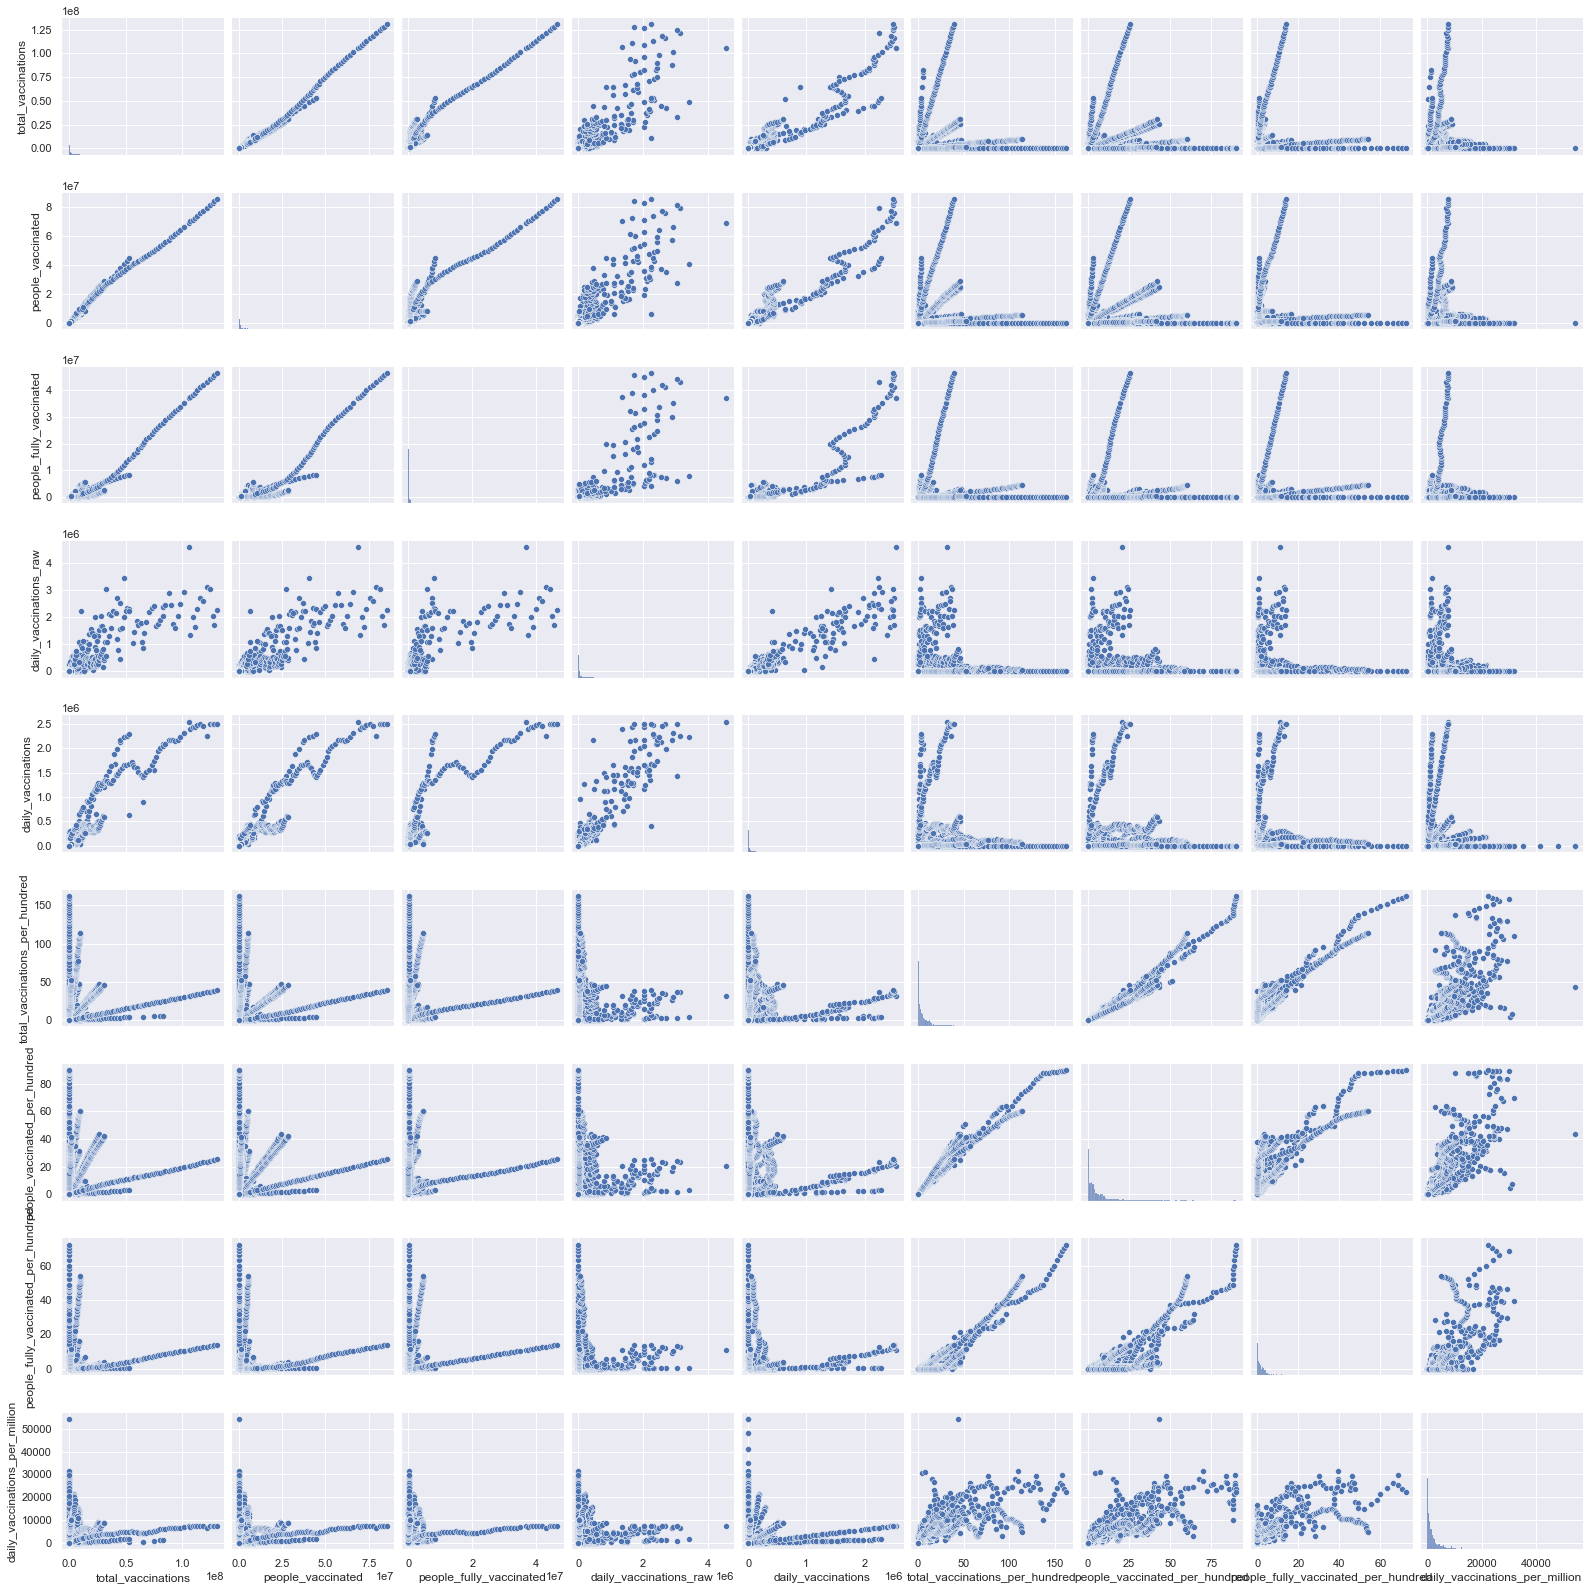

In [125]:
#check correlation of data
sns.pairplot(data=df);

In [126]:
df1['vaccines'].unique()

array(['Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Moderna, Pfizer/BioNTech', 'Moderna',
       'Moderna, Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Covaxin, Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing', 'EpiVacCorona, Sputnik V',
       'Johnson&Johnson', 'Pfizer/BioNTech, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, S

In [127]:

df2 = df1.drop('vaccines', axis=1).join(df['vaccines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('vaccines'))
df3 = df2[['country', 'date', 'vaccines']]
df3.head()

,country,date,vaccines
0,Afghanistan,2021-02-22,Oxford/AstraZeneca
1,Afghanistan,2021-02-23,Oxford/AstraZeneca
2,Afghanistan,2021-02-24,Oxford/AstraZeneca
3,Afghanistan,2021-02-25,Oxford/AstraZeneca
4,Afghanistan,2021-02-26,Oxford/AstraZeneca


In [128]:
df4 = df3.pivot(index=['country', 'date'], columns='vaccines', values='vaccines').reset_index()
df4.sample(20)

vaccines,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,Sputnik V
6774,Spain,2021-01-14,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
2019,Denmark,2020-12-30,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
5923,Romania,2021-03-07,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
1367,Cayman Islands,2021-01-18,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
2421,Falkland Islands,2021-02-18,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,NaN,NaN
1552,China,2021-01-12,NaN,NaN,NaN,NaN,NaN,NaN,Sinopharm/Beijing,Sinopharm/Wuhan,Sinovac,NaN
7035,Switzerland,2021-02-11,NaN,NaN,NaN,Moderna,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
3781,Japan,2021-02-19,NaN,NaN,NaN,NaN,NaN,Pfizer/BioNTech,NaN,NaN,NaN,NaN
1328,Canada,2021-03-09,NaN,NaN,NaN,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,NaN,NaN,NaN,NaN
5514,Paraguay,2021-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sputnik V


In [129]:
lst_ = ['country', 'date', 'vaccines']
df1.drop(lst_, 1, inplace=True)
df1.head(3)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia
1,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia
2,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia


In [130]:
df5 = df4.join(df1)
df5.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
0,Afghanistan,2021-02-22,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,Oxford/AstraZeneca,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia


In [131]:
#ls_vaccine = ['Covaxin', 'Moderna']
#def vaccine_repl(df5): #liste der vaccine und dann als Parameter der Funktion
    #for y in range(len(ls_vaccine)):
   # for column in ls_vaccine:
     #   for x in range(len(column)):
         #       x = 0
           #     print(x)
           #     return x
          #  else:
           #     x == 1
           #     return x
df5['Covaxin'] = df5['Covaxin'].fillna(0)
df5['EpiVacCorona'] = df5['EpiVacCorona'].fillna(0)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].fillna(0)
df5['Moderna'] = df5['Moderna'].fillna(0)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].fillna(0)
df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].fillna(0)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].fillna(0)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].fillna(0)
df5['Sinovac'] = df5['Sinovac'].fillna(0)
df5['Sputnik V'] = df5['Sputnik V'].fillna(0)

In [132]:
df5['Covaxin'] = df5['Covaxin'].replace(['Covaxin'],1)
df5['EpiVacCorona'] = df5['EpiVacCorona'].replace(['EpiVacCorona'],1)
df5['Johnson&Johnson'] = df5['Johnson&Johnson'].replace(['Johnson&Johnson'],1)
df5['Moderna'] = df5['Moderna'].replace(['Moderna'],1)
df5['Oxford/AstraZeneca'] = df5['Oxford/AstraZeneca'].replace(['Oxford/AstraZeneca'],1)

df5['Pfizer/BioNTech'] = df5['Pfizer/BioNTech'].replace(['Pfizer/BioNTech'],1)
df5['Sinopharm/Beijing'] = df5['Sinopharm/Beijing'].replace(['Sinopharm/Beijing'],1)
df5['Sinopharm/Wuhan'] = df5['Sinopharm/Wuhan'].replace(['Sinopharm/Wuhan'],1)
df5['Sinovac'] = df5['Sinovac'].replace(['Sinovac'],1)
df5['Sputnik V'] = df5['Sputnik V'].replace(['Sputnik V'],1)

In [133]:
#vaccine_repl(df5)
df5.sample(20)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,Sputnik V,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped
4844,Mongolia,2021-03-10,0,0,0,0,1,0,0,0,...,0,NaN,NaN,NaN,1159.0,NaN,NaN,NaN,287.0,Europe
7296,Ukraine,2021-03-15,0,0,0,0,1,0,0,0,...,0,NaN,NaN,NaN,21655.0,NaN,NaN,NaN,2144.0,Europe
5181,North Macedonia,2021-02-27,0,0,0,0,0,1,0,0,...,0,NaN,NaN,NaN,31075.0,NaN,NaN,NaN,1814.0,Europe
7392,United Kingdom,2020-12-21,0,0,0,0,1,1,0,0,...,0,NaN,NaN,NaN,3787.0,NaN,NaN,NaN,54.0,Asia
619,Bahrain,2021-03-08,0,0,0,0,1,1,1,0,...,1,512420.0,309741.0,202679.0,6352.0,30.11,18.20,11.91,3733.0,Middle East
6911,Suriname,2021-03-07,0,0,0,0,1,0,0,0,...,0,758705.0,519952.0,238753.0,17579.0,13.90,9.52,4.37,3220.0,Europe
7441,United Kingdom,2021-02-08,0,0,0,0,1,1,0,0,...,0,1226883.0,NaN,NaN,78569.0,1.45,NaN,NaN,932.0,Middle East
2643,Germany,2021-02-11,0,0,0,1,1,1,0,0,...,0,1396881.0,1372680.0,24201.0,78072.0,2.05,2.01,0.04,1146.0,Europe
2706,Gibraltar,2021-01-14,0,0,0,0,0,1,0,0,...,0,332520.0,332520.0,NaN,41439.0,0.40,0.40,NaN,495.0,Europe
2850,Greece,2021-03-12,0,0,0,1,1,1,0,0,...,0,35890.0,22712.0,13178.0,937.0,106.53,67.41,39.11,27812.0,UK & British Oversea


In [134]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675 entries, 0 to 7674
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              7675 non-null   object        
 1   date                                 7675 non-null   datetime64[ns]
 2   Covaxin                              7675 non-null   int64         
 3   EpiVacCorona                         7675 non-null   int64         
 4   Johnson&Johnson                      7675 non-null   int64         
 5   Moderna                              7675 non-null   int64         
 6   Oxford/AstraZeneca                   7675 non-null   int64         
 7   Pfizer/BioNTech                      7675 non-null   int64         
 8   Sinopharm/Beijing                    7675 non-null   int64         
 9   Sinopharm/Wuhan                      7675 non-null   int64         
 10  Sinovac     

In [135]:
#check correlation of data
#sns.pairplot(data=df5)

In [136]:
#Number of countries included in dataset:
df6 = df5.copy()
ncountry = df6['country'].nunique()
print(F'{ncountry} countries are included in the Covid-19 vaccination progress dataset.')

147 countries are included in the Covid-19 vaccination progress dataset.


In [137]:
df6['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Latvia'

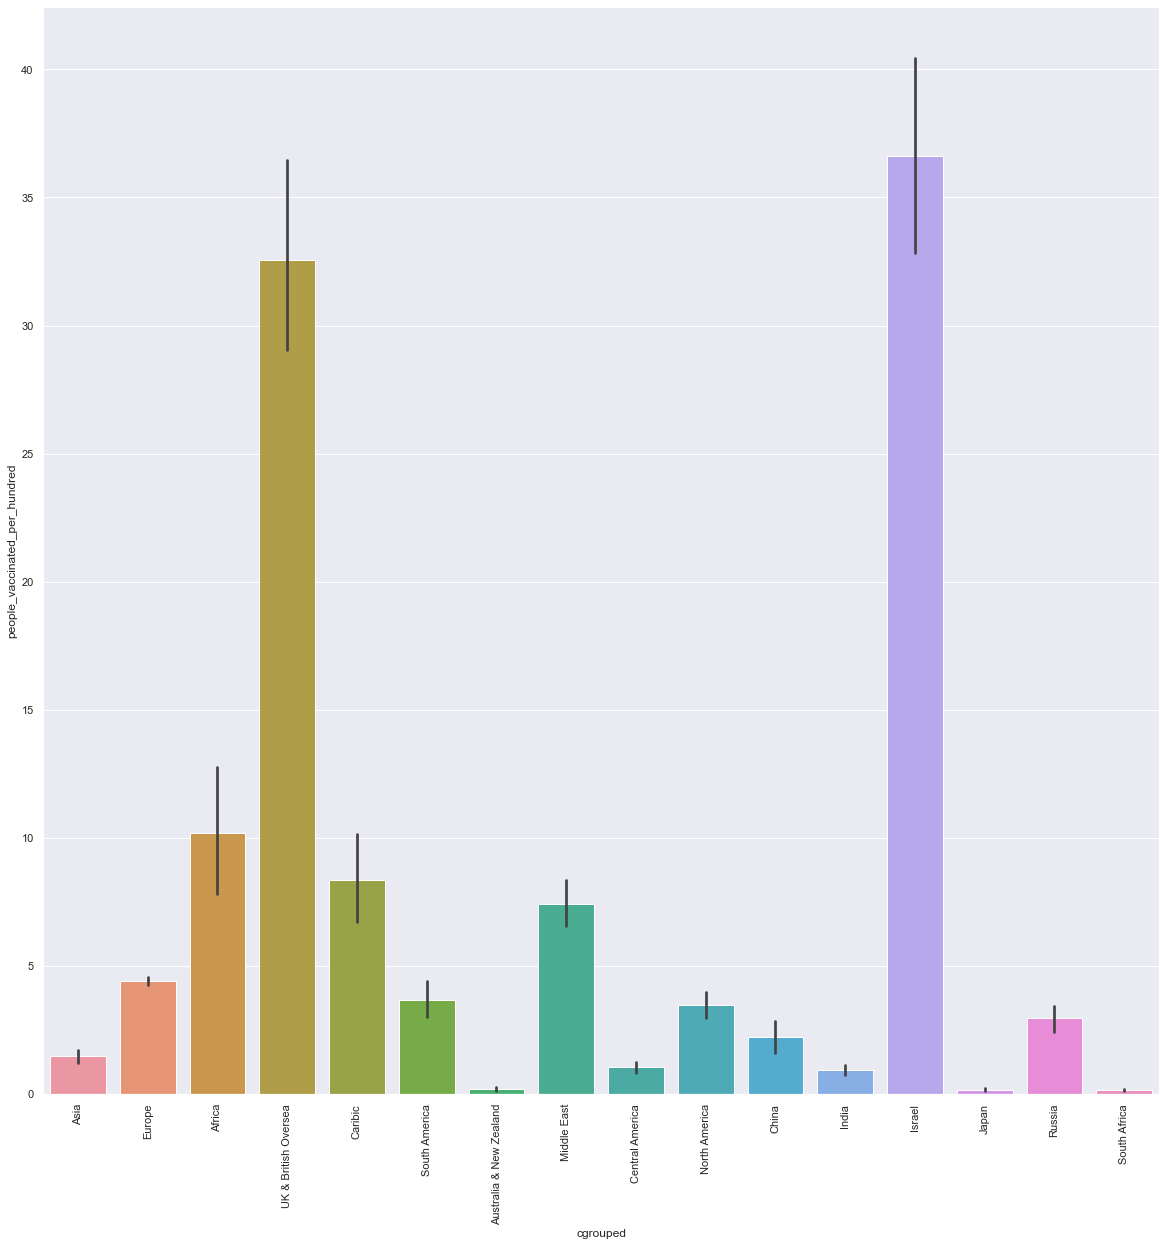

In [138]:
#plot 
sns.barplot(x=df6.cgrouped, y=df6.people_vaccinated_per_hundred)
plt.xticks(rotation=90);

In [139]:
df6.columns.tolist()

['country',
 'date',
 'Covaxin',
 'EpiVacCorona',
 'Johnson&Johnson',
 'Moderna',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinopharm/Wuhan',
 'Sinovac',
 'Sputnik V',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'cgrouped']

In [140]:
#lst_vaccine = [df7['Covaxin'], df7['EpiVacCorona'], df7['Johnson&Johnson'], df7['Moderna'], df7['Oxford/AstraZeneca'], df7['Pfizer/BioNTech'], df7['Sinopharm/Beijing'], df7['Sinopharm/Wuhan'], df7['Sinovac'], df7['Sputnik V']]

In [141]:
#data = df[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
#fig = px.bar(data, x = 'country',y = 'total_vaccinations',title="Number of total vaccinations according to countries")
#fig.show();

In [142]:
#daily vaccinations in %
df6['daily_vaccinations_per_hundred'] = df6['daily_vaccinations_per_million']/10000
df6.head(3)

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
0,Afghanistan,2021-02-22,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia,NaN
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035


In [143]:
lst_vaccines = df3['vaccines']
vaccince_types = df3.groupby(lst_vaccines)['country'].unique()
vaccince_types = vaccince_types.reset_index()
vaccince_types

,vaccines,country
0,Covaxin,[India]
1,EpiVacCorona,[Russia]
2,Johnson&Johnson,"[South Africa, United States]"
3,Moderna,"[Austria, Belgium, Bulgaria, Canada, Czechia, ..."
4,Oxford/AstraZeneca,"[Afghanistan, Angola, Anguilla, Antigua and Ba..."
5,Pfizer/BioNTech,"[Albania, Andorra, Australia, Austria, Bahrain..."
6,Sinopharm/Beijing,"[Argentina, Bahrain, Cambodia, China, Egypt, E..."
7,Sinopharm/Wuhan,"[China, United Arab Emirates]"
8,Sinovac,"[Azerbaijan, Brazil, Chile, China, Colombia, D..."
9,Sputnik V,"[Algeria, Argentina, Bahrain, Belarus, Bolivia..."


In [144]:
df_countries = df.groupby(['country', 'vaccines'])['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                                           'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'].max().reset_index()
df_countries.head()

,country,vaccines,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,Oxford/AstraZeneca,54000.0,54000.0,NaN,2862.0,0.14,0.14,NaN,74.0
1,Albania,Pfizer/BioNTech,53992.0,6073.0,655.0,2946.0,1.88,0.21,0.02,1024.0
2,Algeria,Sputnik V,75000.0,NaN,NaN,3748.0,0.17,NaN,NaN,85.0
3,Andorra,Pfizer/BioNTech,9288.0,7098.0,1265.0,679.0,12.02,9.19,1.64,8788.0
4,Angola,Oxford/AstraZeneca,87022.0,87022.0,NaN,6044.0,0.26,0.26,NaN,184.0


In [145]:
 EU_countries = ['Austria', 'Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Ireland','Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland','Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

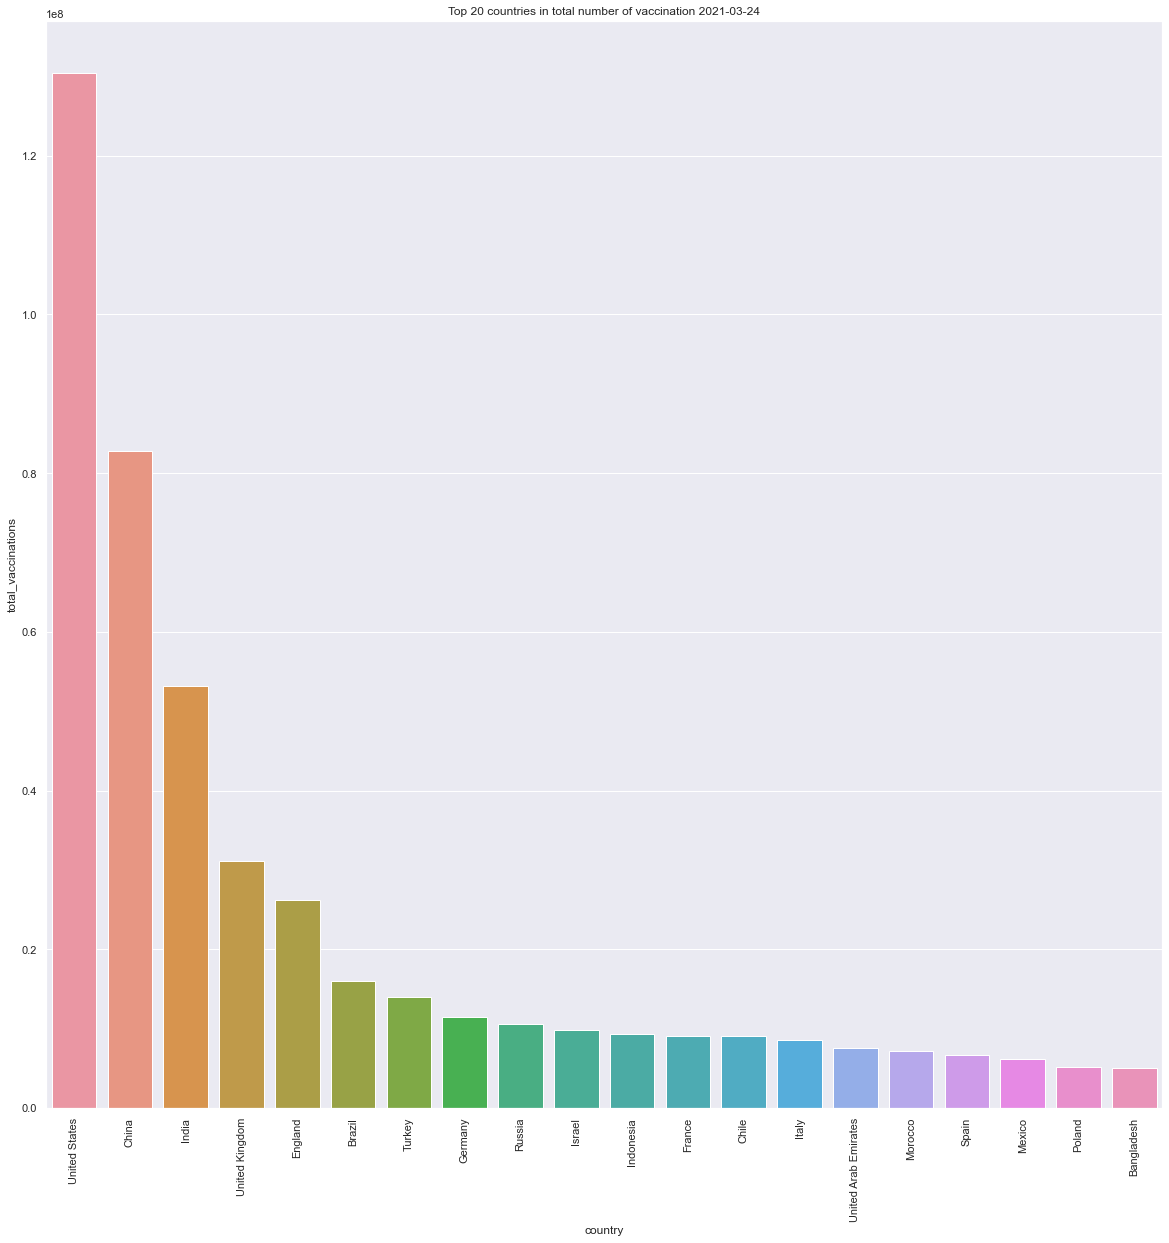

In [146]:
#Number of total vaccinations
data = df_countries[['country','total_vaccinations']].nlargest(20,'total_vaccinations')
sns.barplot(x = 'country', y= 'total_vaccinations', data = data)
d= df['date'].iloc[-1]
plt.title(f"Top 20 countries in total number of vaccination {d}") 
plt.xticks(rotation=90);

In [147]:
#Vaccination rates in Europe vs. UK:
df_countries1 = df.filter('EU_countries')
print(df_countries1)
#data = df_countries1[['country', 'people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
#sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
#d= df['date'].iloc[-1]
#plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
#plt.xticks(rotation=90);

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8079 rows x 0 columns]


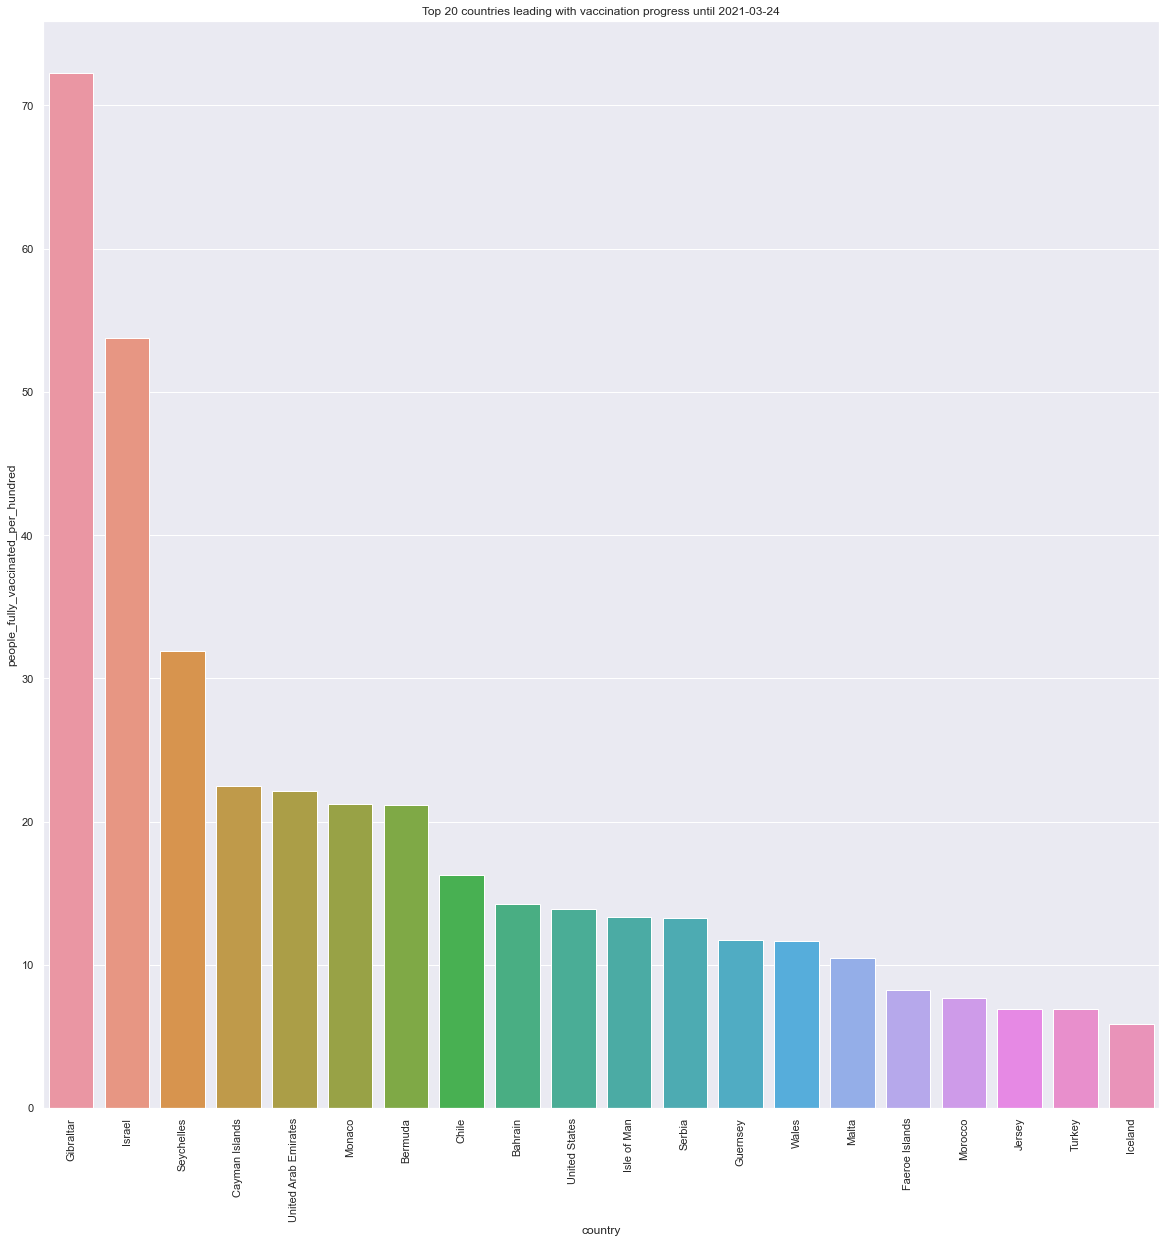

In [148]:
#Top 20 Vaccination rates worldwide:
data = df_countries[['country','people_fully_vaccinated_per_hundred']].nlargest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
d= df['date'].iloc[-1]
plt.title(f"Top 20 countries leading with vaccination progress until {d}") 
plt.xticks(rotation=90);

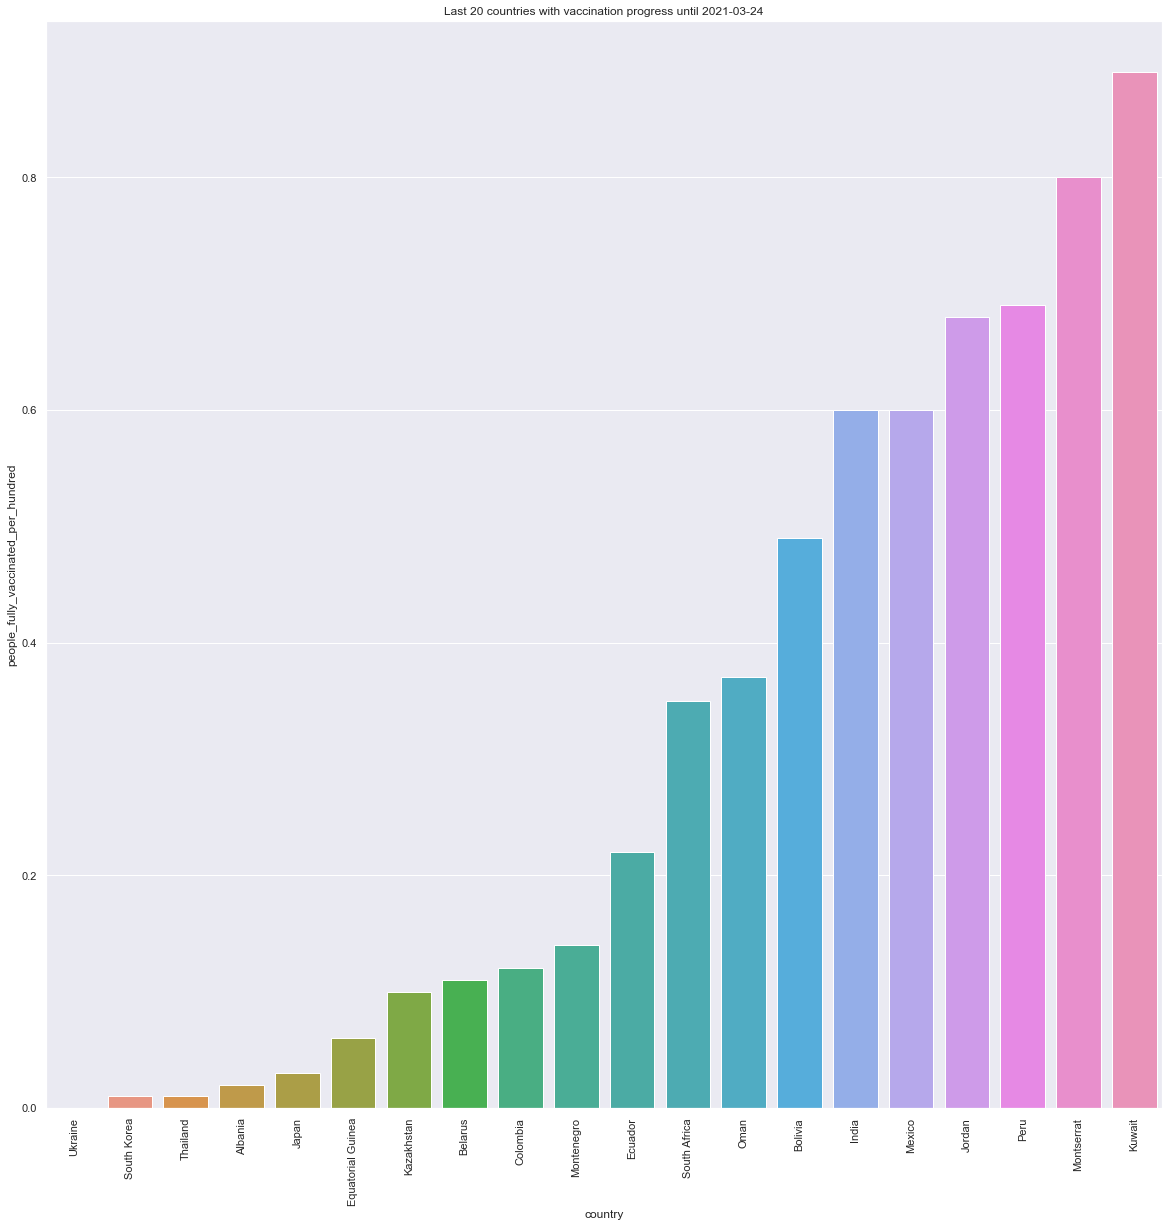

In [149]:
#Last 20 Vaccination rates worldwide:
data = df_countries[['country','people_fully_vaccinated_per_hundred']].nsmallest(20,'people_fully_vaccinated_per_hundred')
sns.barplot(x = 'country', y= 'people_fully_vaccinated_per_hundred', data = data)
d= df['date'].iloc[-1]
plt.title(f"Last 20 countries with vaccination progress until {d}") 
plt.xticks(rotation=90);

In [150]:
#Nan in total_vaccinations_per_hundred
df7 = df6.copy()
df7.head()

,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
0,Afghanistan,2021-02-22,0,0,0,0,1,0,0,0,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,Asia,NaN
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
3,Afghanistan,2021-02-25,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
4,Afghanistan,2021-02-26,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035


In [151]:
df7[df7.total_vaccinations.isnull()]


,country,date,Covaxin,EpiVacCorona,Johnson&Johnson,Moderna,Oxford/AstraZeneca,Pfizer/BioNTech,Sinopharm/Beijing,Sinopharm/Wuhan,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,cgrouped,daily_vaccinations_per_hundred
1,Afghanistan,2021-02-23,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
2,Afghanistan,2021-02-24,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
3,Afghanistan,2021-02-25,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
4,Afghanistan,2021-02-26,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
5,Afghanistan,2021-02-27,0,0,0,0,1,0,0,0,...,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Asia,0.0035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,United States,2021-03-12,0,0,1,1,0,1,0,0,...,NaN,NaN,NaN,338.0,NaN,NaN,NaN,7.0,Africa,0.0007
7568,United States,2021-03-13,0,0,1,1,0,1,0,0,...,NaN,NaN,NaN,338.0,NaN,NaN,NaN,7.0,Africa,0.0007
7584,Uruguay,2021-03-03,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,966.0,NaN,NaN,NaN,22.0,Europe,0.0022
7600,Uruguay,2021-03-19,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,7703.0,NaN,NaN,NaN,176.0,Europe,0.0176


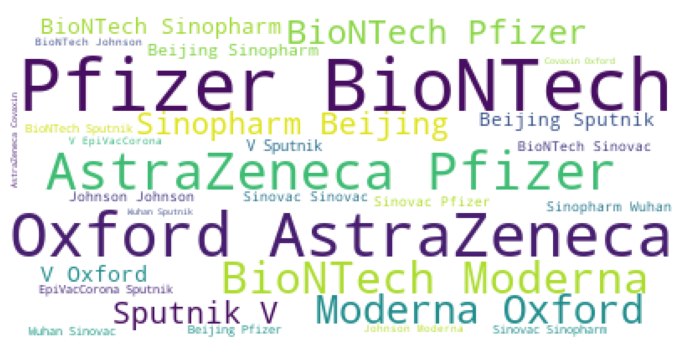

In [152]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.vaccines))

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

In [153]:
#Change country, iso_code, vaccines to categorical
#df6['country'] = df6['country'].astype('category')

#df6['vaccines'] = df6['vaccines'].astype('category')
#check changes
#df6.info()

# Conclusion

***
# COVID-19 Vaccination Twitter tweets
****

Column Description:
id
user_name
user_location
user_description
user_created - creation of user in twitter
user_followers
user_friends
user_favourites
user_verified
date
text
hashtags
source
retweets
favorites
is_retweet

In [154]:
#import dataset vaccination_all_tweets:
df_tweet = pd.read_csv('data/vaccination_all_tweets.csv')

In [155]:
#first check of tweet data:
df_tweet.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [156]:
#Number of columns and rows:
shapet1 = df_tweet.shape
print(f'We have {shapet1[1]} columns and {shapet1[0]} rows in our twitter tweet dataset.')

We have 16 columns and 38547 rows in our twitter tweet dataset.


In [157]:
list(df_tweet)

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [158]:
#information of data types per column:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38547 entries, 0 to 38546
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                38547 non-null  int64 
 1   user_name         38547 non-null  object
 2   user_location     29767 non-null  object
 3   user_description  35940 non-null  object
 4   user_created      38547 non-null  object
 5   user_followers    38547 non-null  int64 
 6   user_friends      38547 non-null  int64 
 7   user_favourites   38547 non-null  int64 
 8   user_verified     38547 non-null  bool  
 9   date              38547 non-null  object
 10  text              38547 non-null  object
 11  hashtags          30330 non-null  object
 12  source            38514 non-null  object
 13  retweets          38547 non-null  int64 
 14  favorites         38547 non-null  int64 
 15  is_retweet        38547 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.2+ MB


- change date to datetime
- check columns with rows less than 38547 for missing values

In [159]:
#profile = ProfileReport(df_tweet, title="Pandas Profiling Report", explorative=True)
#profile

In [160]:
#copy dataset before cleaning
df_tweet1 = df_tweet.copy()